Given the star ratings that I just scraped, I can now agreggate the ratings for specific categories. 
- histogram of star ratings

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
reviews_df = pd.read_csv("data/BA_reviews.csv")

# data and structure overview
# reviews_df.head()
# reviews_df.shape

# drop empty reviews
reviews_df = reviews_df.dropna(subset = ['reviews'])

# reviews_df.iloc[0,1]

#Let's only include verified reviews
verified_df = reviews_df[reviews_df.iloc[:,1].str.contains("Trip Verified")]
# verified_df.shape

#remove the verified
verified_df.loc[:,'reviews'] = verified_df.loc[:,'reviews'].apply(lambda x: x[18:])

In [69]:
# verified_df['Value For Money'].dtype
verified_df

,Unnamed: 0,reviews,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,Aircraft
1,1,My son and I flew to Geneva last Sunday for a...,Family Leisure,Business Class,Gatwick to Geneva,December 2023,2.0,1.0,1.0,1.0,1,no,1.0,1.0,NaN
2,2,For the price paid (bought during a sale) it ...,Solo Leisure,Business Class,Istanbul to London Heathrow,December 2023,1.0,4.0,5.0,2.0,4,yes,1.0,NaN,A320
3,3,Flight left on time and arrived over half an ...,Solo Leisure,Economy Class,London Heathrow to Istanbul,December 2023,3.0,2.0,1.0,5.0,2,no,1.0,NaN,A320
4,4,"Very Poor Business class product, BA is not e...",Business,Business Class,Gatwick to St Lucia,December 2023,1.0,5.0,2.0,1.0,2,no,2.0,2.0,Boeing 777
6,6,Absolutely pathetic business class product. BA...,Business,Business Class,Lisbon to Houston via London Heathrow,November 2023,1.0,2.0,4.0,3.0,1,no,1.0,1.0,Boeing 777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,1408,"After 3 hour delay at airport, flight destined...",Solo Leisure,Economy Class,London Gatwick to Verona,October 2017,4.0,2.0,NaN,1.0,1,no,NaN,NaN,NaN
1409,1409,Flew British Airways from Madrid to London Hea...,Business,Economy Class,Madrid to London Heathrow,September 2017,3.0,4.0,NaN,3.0,1,no,NaN,NaN,NaN
1410,1410,Tel Aviv to London. We arrived at the airport...,Solo Leisure,First Class,Tel Aviv to London,November 2017,5.0,4.0,5.0,2.0,5,yes,4.0,1.0,Boeing 777-200
1411,1411,London to Tel Aviv. Arrived at Heathrow at ab...,Solo Leisure,Business Class,London to Tel Aviv,November 2017,5.0,4.0,4.0,4.0,5,yes,1.0,1.0,Boeing 777-200


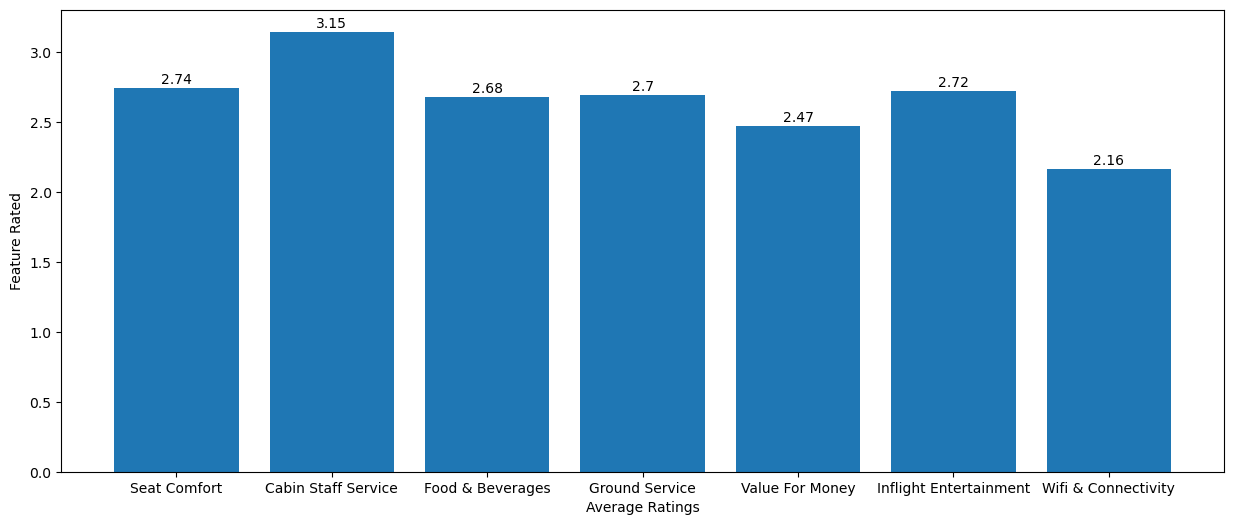

In [70]:
#Average star ratings in each category
star_averages = [verified_df[col].mean() for col in list(verified_df.columns[6:11]) +
                 list(verified_df.columns[12:14])]
# print(star_averages)

plt.figure(figsize = (15,6))
star_categories = list(verified_df.columns[6:11]) + list(verified_df.columns[12:14])
plt.bar(star_categories, star_averages)
plt.xlabel('Average Ratings')
plt.ylabel('Feature Rated')
for index, score in enumerate(star_averages):
    plt.text(index, score + .01, round(score,2), ha = 'center', va = 'bottom')

plt.show()

In [71]:
# Would most reviewers recommend the airline? No.
num_yes = list(verified_df['Recommended']).count('yes')
num_no = list(verified_df['Recommended']).count('no')
print("Yes:", num_yes, " No:", num_no)

Yes: 406  No: 769


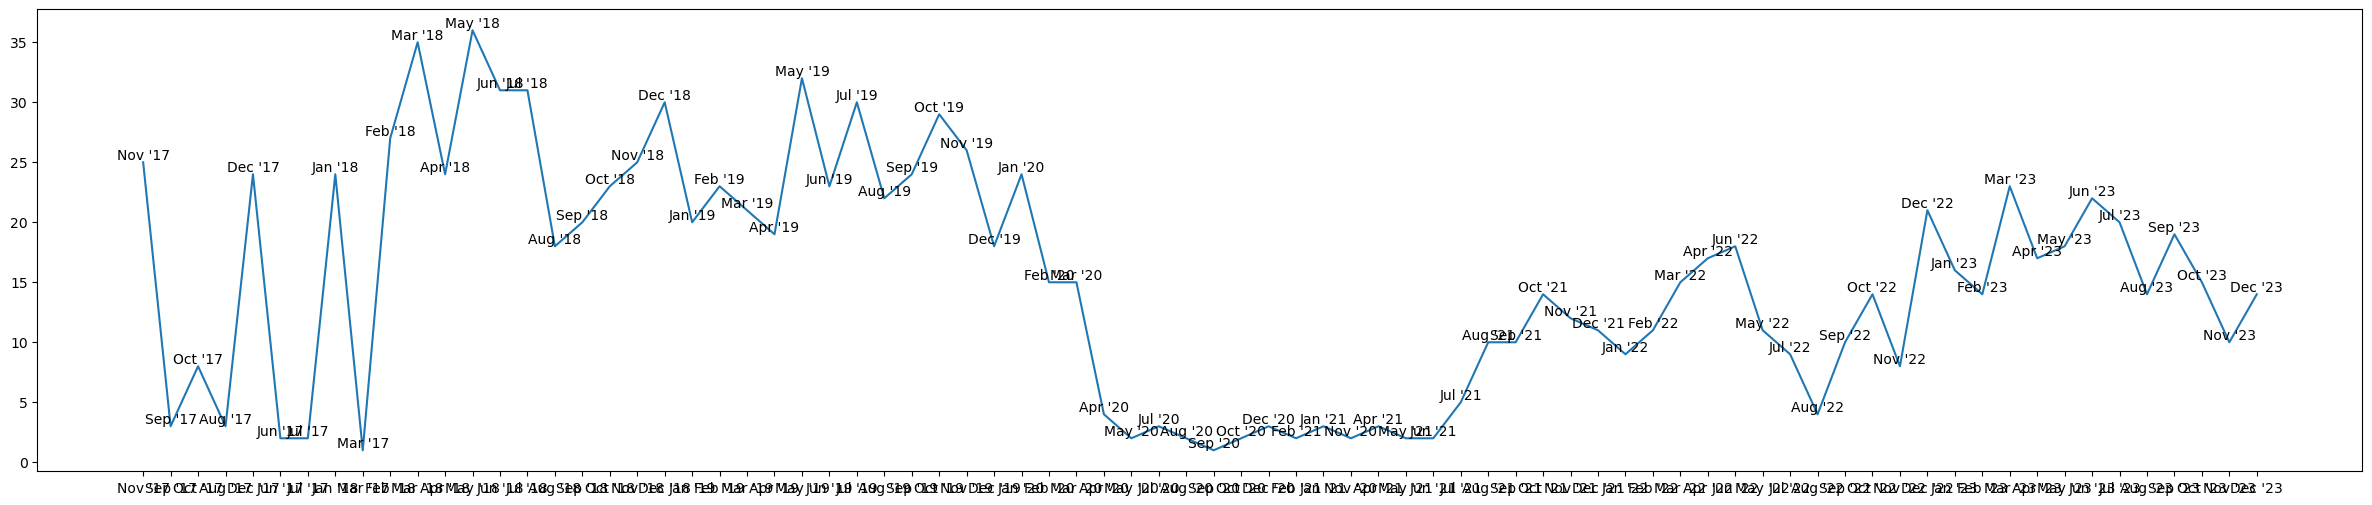

In [72]:
#Plotting number of reviews, which is generally correlated with a small percentage of total passengers
#generally not much of a pattern, maybe some spikes in late spring to summer
#obvious stagnation during pandemic period
month_year = list(verified_df['Date Flown'])[::-1]

time_points = {}

for date_str in month_year:
    date_str = date_str[:3] + f" '" + date_str[-2:]
    if date_str not in time_points:
        time_points[date_str] = 1
    else: 
        time_points[date_str] += 1
# print(time_points)

plt.figure(figsize = (30,6))
x = list(time_points.keys())
y = list(time_points.values())
plt.plot(x,y)
for i, num_reviews in enumerate(y):
    plt.text(x[i], num_reviews, f'{x[i]}', ha = 'center', va = 'bottom')
plt.show()

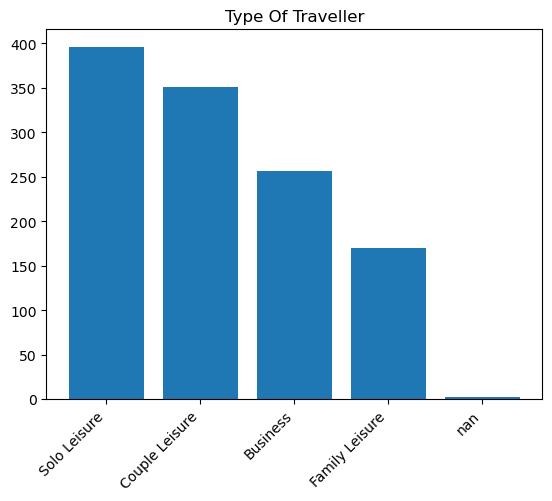

In [95]:
#can't plot by aircraft and time since there isn't enough data on this
#people probably don't care about the type of aircraft in general

def specific_feature(feature_to_compare): 
    categories = {}

    x_y = list(verified_df[feature_to_compare])

    for feature_type in x_y:
        if feature_type not in categories:
            categories[feature_type] = 1
        else:
            categories[feature_type] += 1

    item_freq = sorted(categories.items(), key = lambda x: x[1],reverse = True)
    item, freq = zip(*item_freq)
    item = [str(i) for i in item]
    freq = [int(f) for f in freq]

    # print(type(item[1]))
    # print(type(freq[0]))
    plt.title(feature_to_compare)
    plt.bar(item[0:10], freq[0:10])
    plt.xticks(rotation = 45, ha='right')
    plt.show()

specific_feature('Type Of Traveller') #switch column names and capitalize each word
# aircraft_dates = {} #by month/year, then count by aircraft

# for plane_date in x_y:
#     if plane_date[0] != None and plane_date[0] != None:
#         if plane_date[1] not in aircraft_dates:
#             aircraft_dates[plane_date[1]] = {plane_date[0] : 1}
#         else:
#             aircraft_dates[plane_date[1]][plane_date[0]] += 1
# print(aircraft_dates)


Most frequently flown plane noted in reviews: A320
Months/Years Flown: 2018-2019 busiest years --> hasn't returned to pre-pandemic levels
Type of Passengers: mostly leisure and individual seating is most popular


In [74]:
# feature_to_compare = 'Aircraft'

# x_y = list(zip(verified_df[feature_to_compare],x))

# aircraft_dates = {} #by month/year, then count by aircraft

# for plane_date in x_y:
#     if plane_date[0] != None and plane_date[0] != None:
#         if plane_date[1] not in aircraft_dates:
#             aircraft_dates[plane_date[1]] = {plane_date[0] : 1}
#         else:
#             aircraft_dates[plane_date[1]][plane_date[0]] += 1
# print(aircraft_dates)

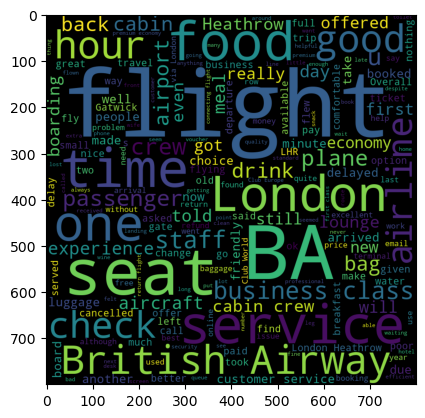

In [75]:
#Trying Wordcloud as suggested by the prompt
#Difficult to tell what elements are positive but food, seating, service, time were topics of discussion
# !pip install wordcloud
from wordcloud import WordCloud

all_reviews_str = verified_df['reviews'].str.cat(sep = ' ')
wordcloud = WordCloud(width=800,height=800).generate(all_reviews_str)

plt.imshow(wordcloud)
plt.show()

In [76]:
#  n-grams of 2+ would be much better
import nltk
# nltk.download('punkt')
from nltk import ngrams
from nltk.tokenize import word_tokenize
import string

words = nltk.word_tokenize(all_reviews_str
                                 .replace(",","")
                                 .replace(".","")
                                 .replace("!","")
                                 .replace("’","")
                           .lower())
n = 5 #try different ones

n_grams = list(ngrams(words,n))

phrases_dict = {}

for gram in n_grams:
    if gram not in phrases_dict:
        phrases_dict[gram] = 1
    else:
        phrases_dict[gram] += 1
phrases_list = [[k,v] for k,v in phrases_dict.items()]

phrases_sorted = sorted(phrases_list, key=lambda x:x[1])[::-1]

print(phrases_sorted[:50])

[[('the', 'cabin', 'crew', 'were', 'very'), 11], [('the', 'flight', 'was', 'delayed', 'by'), 9], [('bottle', 'of', 'water', 'and', 'a'), 9], [('london', 'heathrow', 'with', 'british', 'airways'), 8], [('the', 'back', 'of', 'the', 'plane'), 8], [('we', 'had', 'to', 'wait', 'for'), 7], [('never', 'fly', 'british', 'airways', 'again'), 7], [('i', 'was', 'supposed', 'to', 'fly'), 7], [('never', 'fly', 'with', 'them', 'again'), 7], [('at', 'the', 'end', 'of', 'the'), 6], [('at', 'the', 'back', 'of', 'the'), 6], [('my', 'wife', 'and', 'i', 'were'), 6], [('flight', 'from', 'london', 'heathrow', 'to'), 6], [('in', 'the', 'middle', 'of', 'the'), 6], [('more', 'or', 'less', 'on', 'time'), 6], [('small', 'bottle', 'of', 'water', 'and'), 6], [('london', 'heathrow', 'to', 'new', 'york'), 5], [('with', 'a', 'good', 'selection', 'of'), 5], [('the', 'crew', 'were', 'very', 'friendly'), 5], [('the', 'end', 'of', 'the', 'flight'), 5], [('to', 'london', 'heathrow', 'with', 'british'), 5], [('had', 'to', 

At n = 5, the phrases begin to make sense but this sacrifices the frequency we get for them 
flights are sometimes on time 
perhaps offer more food while on the plane
good crew service
dissatisfaction with organization
london heathrow
good selection of something (perhaps food?)